In [28]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report
import re
import matplotlib.pyplot as plt

In [15]:
train_data_dir="../Trees"
validation_data_dir="../Trees"
batch_size=14
img_height, img_width = 60,80

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 428 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(60, 80, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [23]:
from tensorflow.keras.utils import plot_model 
!pip install pydot
!pip install graphviz
plot_model(model, to_file='model1_plot.png', show_shapes=True,show_dtype=True, show_layer_names=True, expand_nested=True,)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 58, 78, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 39, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2560)             

In [25]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [26]:
history = model.fit(train_generator, steps_per_epoch=6, epochs=10,  verbose=1,
                   validation_data = validation_generator, validation_steps = 4)

Epoch 1/10
6/6 [==============================] - 3s 393ms/step - loss: 0.9368 - accuracy: 0.5897 - val_loss: 0.7715 - val_accuracy: 0.6786
Epoch 2/10
6/6 [==============================] - 2s 352ms/step - loss: 0.8682 - accuracy: 0.6310 - val_loss: 0.7431 - val_accuracy: 0.6786
Epoch 3/10
6/6 [==============================] - 2s 352ms/step - loss: 0.7690 - accuracy: 0.6667 - val_loss: 0.6637 - val_accuracy: 0.7143
Epoch 4/10
6/6 [==============================] - 2s 351ms/step - loss: 0.7816 - accuracy: 0.6310 - val_loss: 0.6656 - val_accuracy: 0.6607
Epoch 5/10
6/6 [==============================] - 2s 346ms/step - loss: 0.7070 - accuracy: 0.6667 - val_loss: 0.7131 - val_accuracy: 0.5893
Epoch 6/10
6/6 [==============================] - 2s 351ms/step - loss: 0.6677 - accuracy: 0.6905 - val_loss: 0.5662 - val_accuracy: 0.7143
Epoch 7/10
6/6 [==============================] - 2s 350ms/step - loss: 0.6171 - accuracy: 0.7262 - val_loss: 0.7703 - val_accuracy: 0.5893
Epoch 8/10
6/6 [====

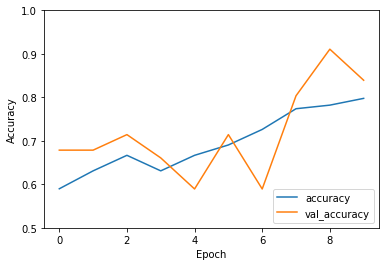

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')